In [0]:
#pip install datadotworld
#!pip install datadotworld[pandas]

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw
from io import *

In [0]:
#!dw configure

In [14]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [17]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')
df = data.dataframes['7004_1']
df.sample(5)

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


ImportError: ignored

                         id asins              brand  ...  vin websiteids  weight
51     AVpfAsCFLJeJML430ZuL   NaN             Sendra  ...  NaN        NaN     NaN
6273   AVpe8HviLJeJML43yxMC   NaN               Nike  ...  NaN        NaN     NaN
5919   AVpfEypQilAPnD_xUY5X   NaN      KATAHDIN GEAR  ...  NaN        NaN     NaN
12526  AVpfsdmlLJeJML43CA5Y   NaN        Dr Scholl's  ...  NaN        NaN     NaN
17818  AVpfYyRDilAPnD_xa4ni   NaN  Unbranded/Generic  ...  NaN        NaN     NaN

[5 rows x 48 columns]

id asins            brand  ...  vin websiteids  weight
3765  AVpfNfMBLJeJML434uir   NaN  Unique Bargains  ...  NaN        NaN     NaN
1678  AVpfUGikLJeJML4364kW   NaN            Scott  ...  NaN        NaN     NaN
4920  AVpfHFPKilAPnD_xVKvI   NaN             PUMA  ...  NaN        NaN     NaN
9610  AVpe40M5LJeJML43xi6C   NaN             VANS  ...  NaN        NaN     NaN
7395  AVpe6KPc1cnluZ0-Zk5_   NaN             Nike  ...  NaN        NaN     NaN

[5 rows x 48 columns]

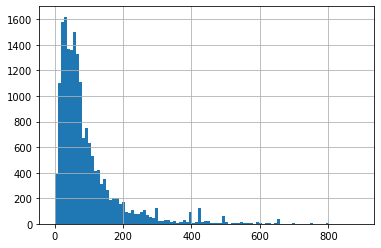

In [18]:
df_usd = df[df.prices_currency == 'USD'].copy()
df_usd.prices_amountmin = df_usd.prices_amountmin.astype(np.float)
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
df_usd_filter = df_usd[df_usd['prices_amountmin'] < filter_max]
df_usd_filter.prices_amountmin.hist(bins=100)

In [0]:
df =df_usd_filter

# Model building


In [0]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [25]:
df.shape

(18280, 48)

In [26]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [30]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [31]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

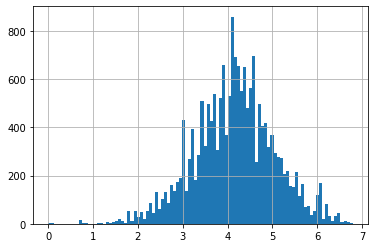

In [34]:
np.log1p(df.prices_amountmin).hist(bins=100)

In [35]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [36]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [37]:
df.brand.value_counts()

Nike                   1709
PUMA                    574
Ralph Lauren            524
New Balance             361
VANS                    356
                       ... 
RYAN SEACREST             1
HyTest by Wolverine       1
New Era                   1
Urban Pipeline            1
Cufflink Aficionado       1
Name: brand, Length: 1856, dtype: int64

In [56]:
df['brand_cat'] = df['brand'].factorize()[0]
df['man_cat'] = df['manufacturer'].factorize()[0]
df['feature_cat'] = df['features'].factorize()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
 def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth = 5)

  scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)


In [55]:
run_model(['brand_cat', 'feature_cat'])

(-58.146106797111734, 4.650059633901864)

In [66]:
cd dw_matrix

/content/drive/My Drive/Colab Notebooks/dw_matrix/dw_matrix


In [68]:
ls

README.md


In [62]:
!git add matrix_one/day4.ipynb

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
